In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [24]:
# Set the font globally to Arial to match document text
plt.rcParams["font.family"] = "Arial"

In [8]:
## Generating the make_moons dataset with 500 samples and some noise introduced for realism
x, y = make_moons(n_samples = 500, noise = 0.2, random_state = 42)

In [18]:
# Display first few rows as a DataFrame for better understanding
data = pd.DataFrame(x, columns=['Feature 1', 'Feature 2'])
data['Target'] = y
data.head()

,Feature 1,Feature 2,Target
0,0.830858,-0.334342,1
1,0.991710,0.879000,0
2,1.107245,-0.470344,1
3,-0.140899,1.033148,0
4,0.405592,1.328529,0


In [20]:
print("Shape of Features (X):", x.shape)  # X contains features
print("Shape of Target (y):", y.shape)   # y contains labels

Shape of Features (X): (500, 2)
Shape of Target (y): (500,)


In [22]:
help(make_moons)

Help on function make_moons in module sklearn.datasets._samples_generator:

make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)
    Make two interleaving half circles.

    A simple toy dataset to visualize clustering and classification
    algorithms. Read more in the :ref:`User Guide <sample_generators>`.

    Parameters
    ----------
    n_samples : int or tuple of shape (2,), dtype=int, default=100
        If int, the total number of points generated.
        If two-element tuple, number of points in each of two moons.

        .. versionchanged:: 0.23
           Added two-element tuple.

    shuffle : bool, default=True
        Whether to shuffle the samples.

    noise : float, default=None
        Standard deviation of Gaussian noise added to the data.

    random_state : int, RandomState instance or None, default=None
        Determines random number generation for dataset shuffling and noise.
        Pass an int for reproducible output across multiple fu

In [6]:
## splitting the data into train-test split, with 70% of the data for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [30]:
## building the logistic regression model
logistic_regression = LogisticRegression(random_state = 42)
logistic_regression.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [32]:
## building the SVM model with RBF kernel
svm = SVC(kernel = 'rbf', C = 1, gamma = 'auto', random_state = 42)
svm.fit(x_train, y_train)

SVC(C=1, gamma='auto', random_state=42)

In [36]:
## making predictions on class for test data
y_pred_lr = logistic_regression.predict(x_test)
y_pred_svm = svm.predict(x_test)

In [38]:
# Evaluate models
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Logistic Regression Accuracy:", accuracy_lr)
print("SVM Accuracy:", accuracy_svm)

Logistic Regression Accuracy: 0.8666666666666667
SVM Accuracy: 0.9733333333333334


In [258]:
# Plot decision boundaries
def plot_decision_boundary(model, x, y, title = "Decision Boundary", model_name = "Model", caption = ""):
    x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha = 0.8, cmap = plt.cm.Paired)
    scatter = plt.scatter(x[:, 0], x[:, 1], c = y, edgecolor = 'k', cmap = plt.cm.Paired)
    plt.title(title, fontsize = 15)
    plt.xlabel("Feature 1", fontsize = 11)
    plt.ylabel("Feature 2", fontsize = 11)
    # Add annotations for clarity
    if model_name == "Logistic Regression":
        plt.annotate('Linear decision boundary', xy = (-0.9, -0.2), xytext = (-1.75, -0.75),
                     arrowprops = dict(facecolor = 'black'),
                     fontsize = 11, color = 'black', wrap = True, ha = 'left')
    else:
        plt.annotate('Nonlinear decision boundary', xy = (-.77, -0.25), xytext = (-1.75, -0.95),
                      arrowprops = dict(facecolor='black'),
                     fontsize = 11, color = 'black', wrap = True, ha = 'left')
    # Add caption as text in the plot
    plt.figtext(0.5, -0.15, caption, wrap = True, horizontalalignment = 'left', fontsize = 11, color = 'black', ha = 'left')

    # Add legend for the classes
    handles, labels = scatter.legend_elements()
    plt.legend(handles, labels, title="Classes", loc="upper right")

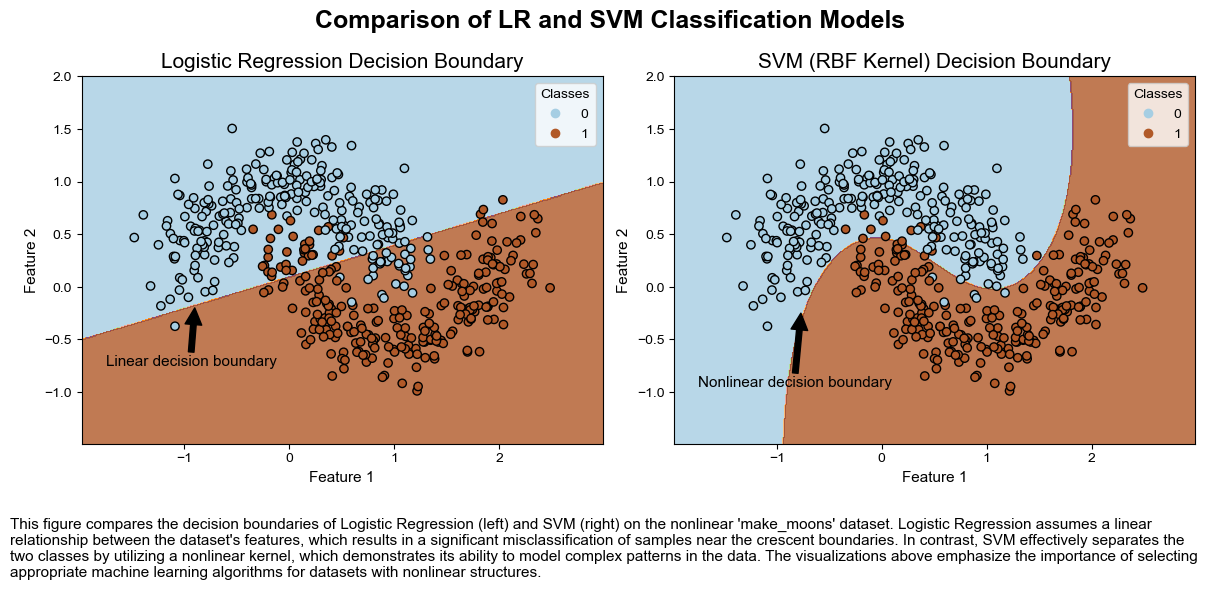

In [286]:
# Plot Logistic Regression decision boundary
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(logistic_regression, x, y, title = "Logistic Regression Decision Boundary", model_name = "Logistic Regression")
# Plot SVM decision boundary
plt.subplot(1, 2, 2)
plot_decision_boundary(svm, x, y, title = "SVM (RBF Kernel) Decision Boundary")
plt.subplots_adjust(bottom=0.2)
plt.suptitle('Comparison of LR and SVM Classification Models', fontsize = 18, fontweight = 'bold')
plt.figtext(0, -0.15, "This figure compares the decision boundaries of Logistic Regression (left) and SVM (right) on the nonlinear 'make_moons' "
            "dataset. Logistic Regression assumes a linear relationship between the dataset's features, which results in a significant "
            "misclassification of samples near the crescent boundaries. In contrast, SVM effectively separates the two classes by utilizing a "
            "nonlinear kernel, which demonstrates its ability to model complex patterns in the data. The visualizations above emphasize the importance "
            "of selecting appropriate machine learning algorithms for datasets with nonlinear structures.", wrap = True, horizontalalignment = 'left', 
            fontsize = 11, color = 'black', ha = 'left' )
plt.tight_layout()
plt.savefig('LR vs SVM.svg', format = 'svg', bbox_inches="tight")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


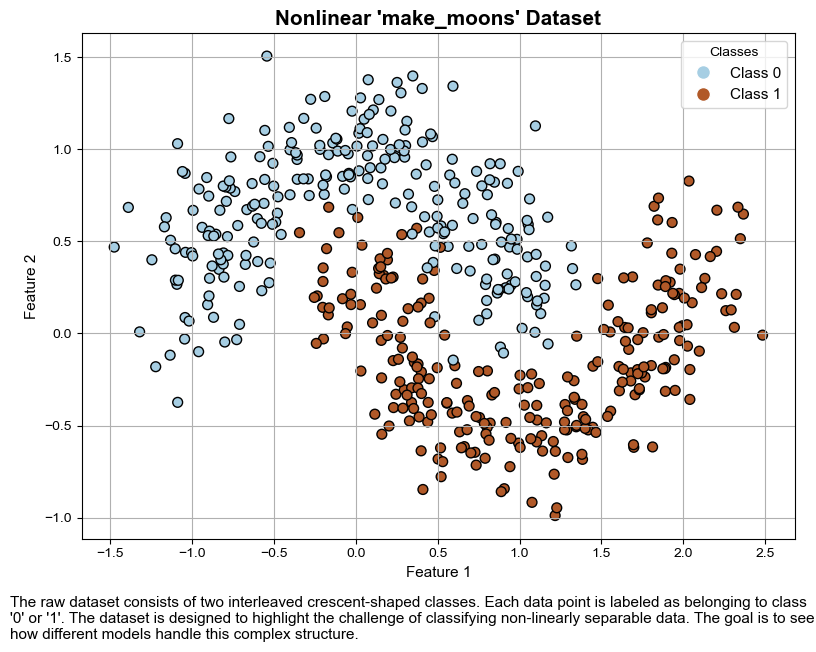

In [301]:
plt.figure(figsize = (8, 6))
scatter = plt.scatter(x[:, 0], x[:, 1], c = y, cmap = plt.cm.Paired, edgecolor = 'k', marker = 'o', s = 50)
plt.title("Nonlinear 'make_moons' Dataset", fontsize = 15, fontweight = 'bold')
plt.xlabel('Feature 1', fontsize = 11)
plt.ylabel('Feature 2', fontsize = 11)
plt.legend()
plt.figtext(0, -0.07, "The raw dataset consists of two interleaved crescent-shaped classes. Each data point is labeled as belonging to class '0' or '1'. "
            "The dataset is designed to highlight the challenge of classifying non-linearly separable data. "
            "The goal is to see how different models handle this complex structure.", 
            wrap = True, horizontalalignment = 'left', fontsize=11, color='black', ha='left')

# Adding a legend
classes = ["Class 0", "Class 1"]
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(0.0), markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(1.0), markersize=10)]
plt.legend(handles, classes, title="Classes", loc='best', fontsize=11)

plt.grid(True)
plt.tight_layout()
plt.savefig('Make_moons dataset visualization.svg', format = 'svg', bbox_inches="tight")
plt.show()

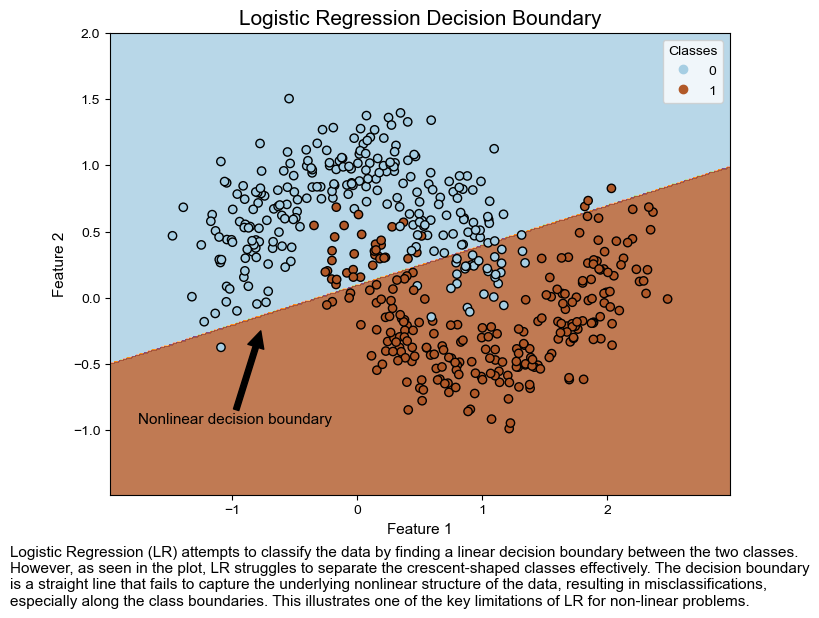

In [270]:
plt.figure(figsize = (8, 6))
plot_decision_boundary(logistic_regression, x, y, title = "Logistic Regression Decision Boundary")
                       
plt.figtext(0, -0.07, "Logistic Regression (LR) attempts to classify the data by finding a linear decision boundary between the two classes. "
                        "However, as seen in the plot, LR struggles to separate the crescent-shaped classes effectively. "
                        "The decision boundary is a straight line that fails to capture the underlying nonlinear structure of the data, "
                        "resulting in misclassifications, especially along the class boundaries. This illustrates one of the key limitations of LR for non-linear problems.",
           wrap=True, horizontalalignment='left', fontsize=11, color='black', ha='left')
plt.show()